In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
class BodyWeight():
    """Model do obliczania zmiany masy ciała w czasie.
    Args:
        t (int): Czas trwania symulacji. [dni]
        m (float): Początkowa masa ciała [kg].
        h (int): Wzrost [cm].
        a (int): Wiek [lat].
        c (int): Dzienna liczba spożywanych kalorii [kcal].
        f (float): Poziom aktywności fizycznej.
        sex (str): Płeć - 'k' dla kobiety, 'm' dla mężczyzny.
    """
    def __init__(self, t, m, h, a, c, f, sex):
        self.t = t
        self.m = m
        self.h = h
        self.a = a
        self.c = c
        self.f = f
        if sex == "k":
            self.s = -161
        elif sex == "m":
            self.s = 5
        self.result_euler = []
        self.result_runge_kutta = []
        self.result_analytical = []
        self.time_euler = []
        self.time_runge_kutta = []
        self.time_analytical = []

    def BMR(self):
        """ Oblicz podstawową przemianę materii (BMR). """
        P = 10 * self.m + 6.25 * self.h - 5 * self.a + self.s
        return P

    def dm_dt(self, m):
        dm = (self.c - self.f * (10 * m + 6.25 * self.h - 5 * self.a + self.s)) / 7700
        return dm
    
    def final_weight_euler(self, h = 0.001):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Eulera. """
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            m = m + self.dm_dt(m) * h
            t = t + h
            self.time_euler.append(t)
            self.result_euler.append(m)
        return m
    
    def final_weight_runge_kutta(self, h = 0.001):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Runge-Kutta. """
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            k1 = h * self.dm_dt(m)
            k2 = h * self.dm_dt(m + 0.5 * k1)
            k3 = h * self.dm_dt(m + 0.5 * k2)
            k4 = h * self.dm_dt(m + k3)
            m = m + (k1 + 2 * k2 + 2 * k3 + k4) / 6
            t = t + h
            self.time_runge_kutta.append(t)
            self.result_runge_kutta.append(m)
        return m
    
    def final_weight_analytical(self):
            """Oblicz zmianę masy ciała po upływie czasu t - implementacja metody analitycznej"""
            for t in range(1, self.t + 1):
                m = (self.m - (self.c - self.f * (6.25 * self.h - 5 * self.a + self.s)) / (10 * self.f)) * math.exp(-self.f * t / 770) + (self.c - self.f * (6.25 * self.h - 5 * self.a + self.s)) / (10 * self.f)
                self.result_analytical.append(m)
                self.time_analytical.append(t)
            return m
        
    # wykres na podstawie rozwiązania analitycznego
    def all_weights(self):
        plt.figure(figsize=(8, 6)) 
        plt.plot(self.time_analytical, self.result_analytical) 
        plt.xlabel('Czas [dni]')
        plt.ylabel('Masa ciała [kg]')
        plt.title(f'Zmiana masy ciała')
        plt.grid()
        plt.show()
        
    def errors(self):
        r_k = [] #tabela metoda analityczna - metoda runge-knutta
        euler = [] #tabela metoda analityczna - metoda eulera
        steps=[0.001, 0.01, 0.1, 1] #kolejne kroki czasowe powiekszone i-razy

        for h in steps:
            euler.append(np.abs(self.final_weight_analytical() - self.final_weight_euler(h) ))
            r_k.append(np.abs(self.final_weight_analytical() - self.final_weight_runge_kutta(h) ))

        plt.figure(figsize=(8, 6))
        plt.loglog(steps, euler, label='Euler')
        plt.loglog(steps, r_k, label='Runge-Kutta')
        plt.xlabel('Krok czasowy')
        plt.ylabel('Błąd')
        plt.title('Błąd między rozwiązaniami numerycznymi, a rozwiązaniem analitycznym')
        plt.legend()
        plt.grid()
        plt.show()

71.34247058683727
71.342470586837
71.34164237219012
71.34247058683795
71.34247058683738


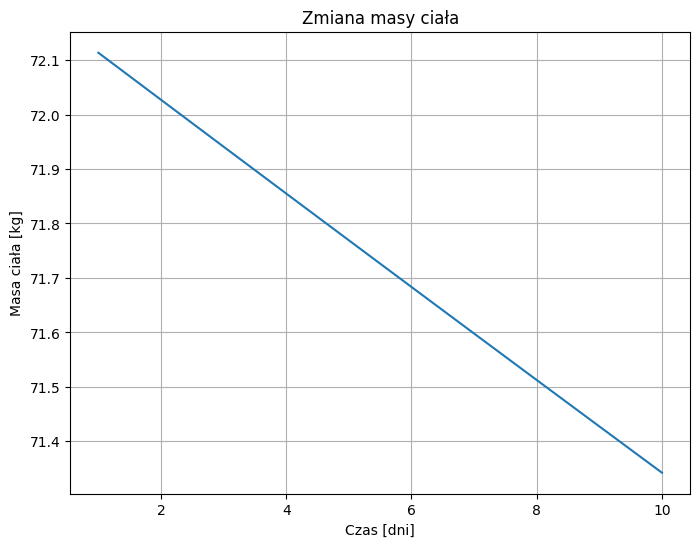

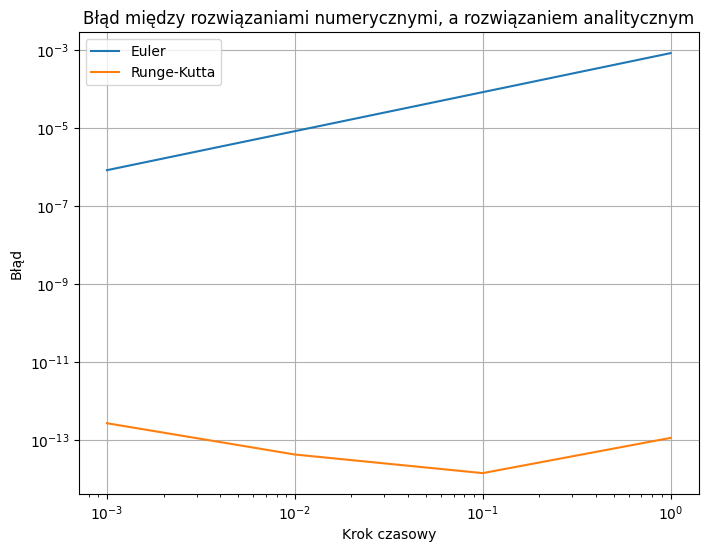

In [23]:
Mateusz = BodyWeight(t=10, m=72.2, h=170, a=29, c=1800, f=1.5, sex="m")
Mateusz.BMR()
print(Mateusz.final_weight_analytical())
print(Mateusz.final_weight_runge_kutta())
print(Mateusz.final_weight_euler(h=1))
print(Mateusz.final_weight_runge_kutta(h=0.0001))
print(Mateusz.final_weight_runge_kutta(h=1))
Mateusz.all_weights()
Mateusz.errors()

1374.0
54.814421133395356
h=0.001: 54.81442227250515
h=0.01: 54.814422272505006
h=0.1: 54.8144222725049
h=1: 54.81442227250506
analityczny wynik: 54.81442227250491


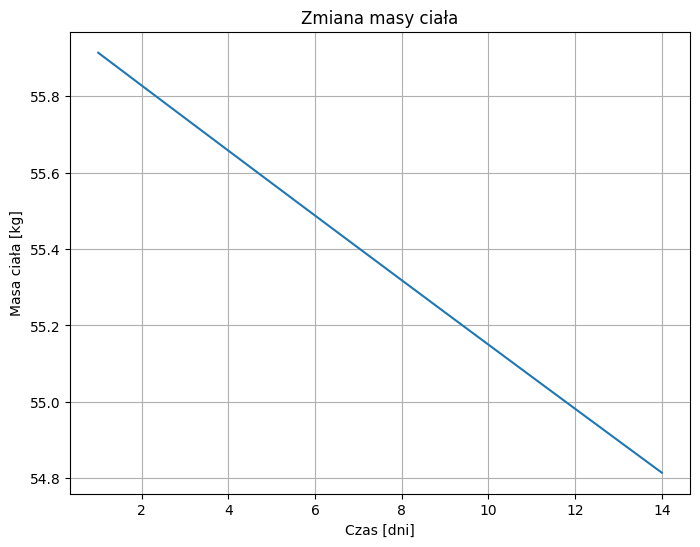

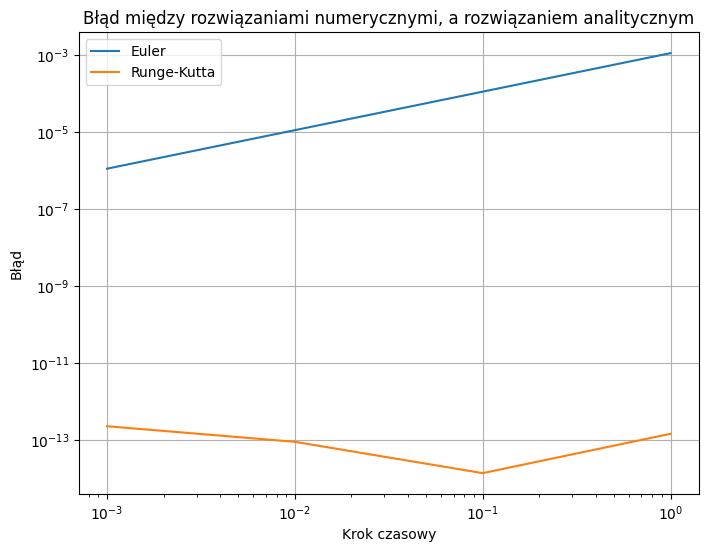

-2.3447910280083306e-13 1.4210854715202004e-14


In [24]:
Ania = BodyWeight(t=14, m=56, h=172, a=20, c=1400, f=1.5, sex="k")
print(Ania.BMR())
print(Ania.final_weight_euler())
print('h=0.001:', Ania.final_weight_runge_kutta())
print('h=0.01:', Ania.final_weight_runge_kutta(0.01))
print('h=0.1:', Ania.final_weight_runge_kutta(0.1))
print('h=1:', Ania.final_weight_runge_kutta(1))
print('analityczny wynik:', Ania.final_weight_analytical())
Ania.all_weights()
Ania.errors()

h001 = Ania.final_weight_analytical() - Ania.final_weight_runge_kutta(0.001)
h01 = Ania.final_weight_analytical() - Ania.final_weight_runge_kutta(0.1)
print(h001,h01)